In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('dataset.csv')
data

,text,is_rumor,user.handle,topic
0,Charlie Hebdo became well known for publishing...,0.0,BBCDanielS,charliehebdo
1,"Now 10 dead in a shooting there today RT ""@BBC...",0.0,robbylevy,charliehebdo
2,@BBCDanielS @BBCWorld I'm guessing this is bei...,0.0,ModerateInAll,charliehebdo
3,@BBCDanielS @BBCWorld why would you mention th...,0.0,GabTarquini,charliehebdo
4,@BBCDanielS @BBCWorld perps identified?,0.0,freethought41,charliehebdo
...,...,...,...,...
62440,@AnonyOps @Xplant So that means its ok to torc...,1.0,RianAlden,ferguson
62441,"@RianAlden not at all, but they need to change...",1.0,Xplant,ferguson
62442,@Xplant @AnonyOps Absoluteky. But it pains me...,1.0,RianAlden,ferguson
62443,@Xplant @AnonyOps I'm curious how many of thes...,1.0,RianAlden,ferguson


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62445 entries, 0 to 62444
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         62445 non-null  object 
 1   is_rumor     62443 non-null  float64
 2   user.handle  62443 non-null  object 
 3   topic        49668 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


In [4]:
data.shape

(62445, 4)

In [5]:
# Data Preprocessing
# Handle missing values in rumour column by dropping them ( imputation makes little sense to me as it is the output variable )
data = data.dropna(subset=['is_rumor'])
data

,text,is_rumor,user.handle,topic
0,Charlie Hebdo became well known for publishing...,0.0,BBCDanielS,charliehebdo
1,"Now 10 dead in a shooting there today RT ""@BBC...",0.0,robbylevy,charliehebdo
2,@BBCDanielS @BBCWorld I'm guessing this is bei...,0.0,ModerateInAll,charliehebdo
3,@BBCDanielS @BBCWorld why would you mention th...,0.0,GabTarquini,charliehebdo
4,@BBCDanielS @BBCWorld perps identified?,0.0,freethought41,charliehebdo
...,...,...,...,...
62440,@AnonyOps @Xplant So that means its ok to torc...,1.0,RianAlden,ferguson
62441,"@RianAlden not at all, but they need to change...",1.0,Xplant,ferguson
62442,@Xplant @AnonyOps Absoluteky. But it pains me...,1.0,RianAlden,ferguson
62443,@Xplant @AnonyOps I'm curious how many of thes...,1.0,RianAlden,ferguson


In [6]:
data['is_rumor'].nunique() # checking if there are only two outputs 1 and 0

2

In [7]:
# Count the values of 'is_rumor'
rumor_counts = data['is_rumor'].value_counts()  # i am checking how balanced the dataset is

print("Count of is_rumor values:")
print(rumor_counts)

Count of is_rumor values:
is_rumor
0.0    48619
1.0    13824
Name: count, dtype: int64


In [8]:
# Convert text to lowercase and remove unnecessary characters
data.loc[:, 'text'] = data['text'].str.lower().str.replace('[^\w\s]', '', regex=True)  # dealing with nlp , i found the standard protocol online , to make everything lower  case  remove special characters
data['text']

,text
0,charlie hebdo became well known for publishing...
1,now 10 dead in a shooting there today rt bbcda...
2,bbcdaniels bbcworld im guessing this is being ...
3,bbcdaniels bbcworld why would you mention that...
4,bbcdaniels bbcworld perps identified
...,...
62440,anonyops xplant so that means its ok to torch ...
62441,rianalden not at all but they need to change s...
62442,xplant anonyops absoluteky but it pains me to...
62443,xplant anonyops im curious how many of these p...


In [9]:

data.loc[:, 'is_rumor'] = data['is_rumor'].astype(int)
data['is_rumor']

,is_rumor
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
62440,1.0
62441,1.0
62442,1.0
62443,1.0


In [10]:
# Train-Test Split
X = data[['text']]
y = data['is_rumor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:

# Text vectorization
# convert documents into vectors to see how relevant each word is to the document
text_transformer = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(stop_words='english'))
])

In [12]:
# Scaling numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [13]:
# Combine text and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'text')
    ]
)

In [14]:
# Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression( max_iter=1000))
])

In [16]:
modelSVC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', probability=False))  # removed proabilities and put kernel to linear as it was taking too long to train
])

In [17]:
# Model Training
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  'text')])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [18]:
modelSVC.fit(X_train, y_train) # takes 30 minutes to train

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  'text')])),
                ('classifier', SVC(kernel='linear'))])

In [20]:
predictionsSVC = modelSVC.predict(X_test)
reportSVC = classification_report(y_test, predictionsSVC, output_dict=True)
print(classification_report(y_test, predictionsSVC))
accuracySVC=round(accuracy_score(y_test, predictionsSVC),2)
print("Accuracy:", round(accuracy_score(y_test, predictionsSVC),2) * 100,'%')

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      9754
         1.0       0.87      0.72      0.79      2735

    accuracy                           0.92     12489
   macro avg       0.90      0.85      0.87     12489
weighted avg       0.91      0.92      0.91     12489

Accuracy: 92.0 %


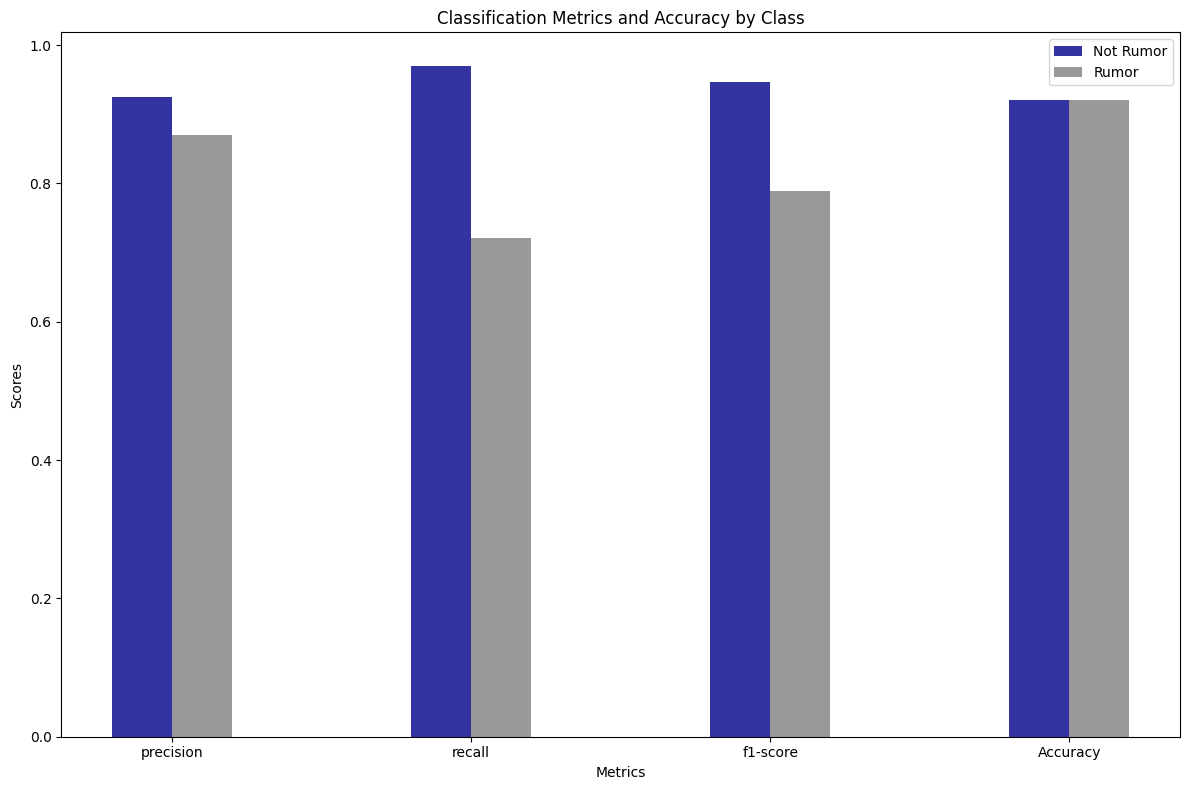

In [21]:
metrics = ['precision', 'recall', 'f1-score']

values_class_0 = [reportSVC['0.0'][metric] for metric in metrics] + [accuracySVC]
values_class_1 = [reportSVC['1.0'][metric] for metric in metrics] + [accuracySVC]

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
opacity = 0.8
index = range(len(metrics) + 1)

rects1 = ax.bar([p - bar_width/2 for p in index], values_class_0, bar_width, alpha=opacity, color='darkblue', label='Not Rumor')
rects2 = ax.bar([p + bar_width/2 for p in index], values_class_1, bar_width, alpha=opacity, color='gray', label='Rumor')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics and Accuracy by Class')
ax.set_xticks(index)
ax.set_xticklabels(metrics + ['Accuracy'])
ax.legend()
plt.tight_layout()
plt.show()

Confusion Matrix:
[[9461  293]
 [ 763 1972]]


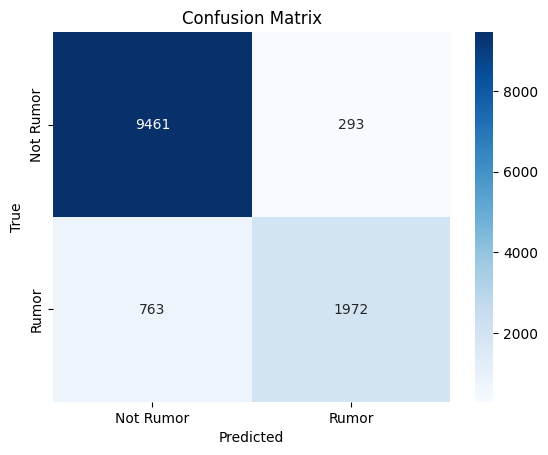

In [22]:
conf_matrixSVC = confusion_matrix(y_test, predictionsSVC)
print("Confusion Matrix:")
print(conf_matrixSVC)


sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Rumor', 'Rumor'], yticklabels=['Not Rumor', 'Rumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Model Evaluation
predictions = model.predict(X_test)
report = classification_report(y_test, predictions, output_dict=True)
print(classification_report(y_test, predictions))
accuracy=round(accuracy_score(y_test, predictions),2)
print("Accuracy:", round(accuracy_score(y_test, predictions),2) * 100,'%')

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      9754
         1.0       0.85      0.57      0.68      2735

    accuracy                           0.88     12489
   macro avg       0.87      0.77      0.81     12489
weighted avg       0.88      0.88      0.88     12489

Accuracy: 88.0 %


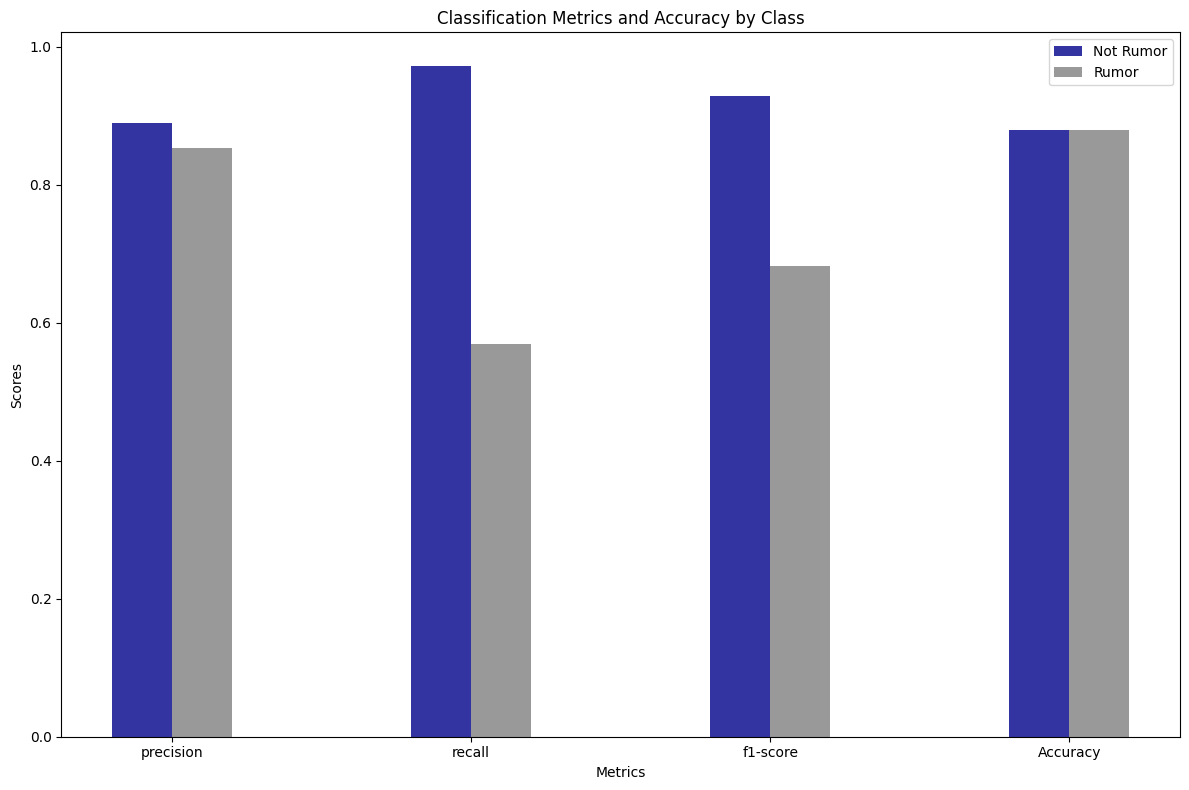

In [24]:

metrics = ['precision', 'recall', 'f1-score']


values_class_0 = [report['0.0'][metric] for metric in metrics] + [accuracy]
values_class_1 = [report['1.0'][metric] for metric in metrics] + [accuracy]


fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
opacity = 0.8
index = range(len(metrics) + 1)

rects1 = ax.bar([p - bar_width/2 for p in index], values_class_0, bar_width, alpha=opacity, color='darkblue', label='Not Rumor')
rects2 = ax.bar([p + bar_width/2 for p in index], values_class_1, bar_width, alpha=opacity, color='gray', label='Rumor')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics and Accuracy by Class')
ax.set_xticks(index)
ax.set_xticklabels(metrics + ['Accuracy'])
ax.legend()
plt.tight_layout()
plt.show()

Confusion Matrix:
[[9485  269]
 [1178 1557]]


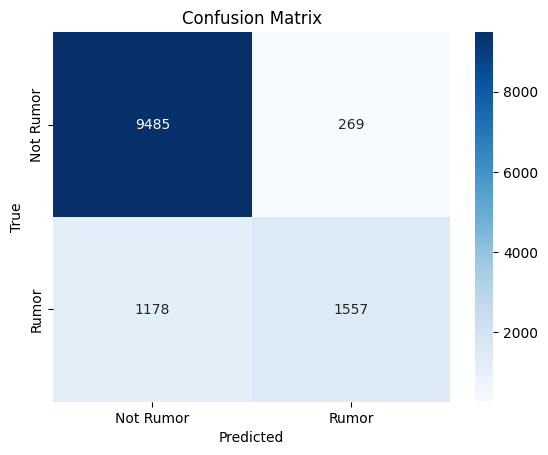

In [25]:

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Rumor', 'Rumor'], yticklabels=['Not Rumor', 'Rumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()